
#  Using .melt() for stocks vs bond performance

##  Assignment 

It is widespread knowledge that the price of bonds is inversely related to the price of stocks. In this last exercise, you'll review many of the topics in this chapter to confirm this. You have been given a table of percent change of the US 10-year treasury bond price. It is in a wide format where there is a separate column for each year. You will need to use the `.melt()` method to reshape this table.

Additionally, you will use the `.query()` method to filter out unneeded data. You will merge this table with a table of the percent change of the Dow Jones Industrial stock index price. Finally, you will plot data.

The tables `ten_yr` and `dji` have been loaded for you.

##  Pre exercise code 

```
from pickle import load
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

fn_dji = 'https://assets.datacamp.com/production/repositories/5486/datasets/0d7a5809f87e8afec8e94619f9534304449b9eaa/DJI_perc.p'
fn_bond = 'https://assets.datacamp.com/production/repositories/5486/datasets/d4467a1a53c357d5b7ca611d0a05b7d6dd1fc238/TNX_horz_perc.p'

ten_yr= load(urllib.request.urlopen(fn_bond))
dji = load(urllib.request.urlopen(fn_dji))
```



##  Instructions 

- Use `.melt()` on `ten_yr` to unpivot everything except the `metric` column, setting `var_name='date'` and `value_name='close'`. Save the result to `bond_perc`.
- Using the `.query()` method, select only those rows were `metric` equals 'close', and save to `bond_perc_close`.
- Use `merge_ordered()` to merge `dji` (left table) and `bond_perc_close` on `date` with an inner join, and set `suffixes` equal to `('_dow', '_bond')`. Save the result to `dow_bond`.
- Using `dow_bond`, plot only the Dow and bond values.

In [126]:
from pickle import load
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

dji = pd.read_pickle("DJI_perc.p")
ten_yr = pd.read_pickle("TNX_horz_perc.p")

In [127]:
ten_yr.head()

,metric,2007-02-01,2007-03-01,2007-04-01,2007-05-01,2007-06-01,2007-07-01,2007-08-01,2007-09-01,2007-10-01,...,2009-03-01,2009-04-01,2009-05-01,2009-06-01,2009-07-01,2009-08-01,2009-09-01,2009-10-01,2009-11-01,2009-12-01
0,open,0.033491,-0.060449,0.025426,-0.004312,0.060632,0.027154,-0.059233,-0.046271,0.014400,...,0.045888,-0.102599,0.191049,0.106726,0.023966,-0.006687,-0.046564,-0.032068,0.034347,-0.050544
1,high,-0.007338,-0.040657,0.022046,0.030576,0.080268,-0.021633,-0.059796,-0.038446,0.003615,...,-0.004257,0.041105,0.186987,0.068121,-0.061784,0.031864,-0.090324,0.012447,-0.004191,0.099327
2,low,-0.016147,-0.007984,0.031075,-0.002168,0.059105,-0.027288,-0.051677,-0.043372,0.002558,...,-0.062405,0.068994,0.168185,0.123172,-0.055266,0.039510,-0.035946,-0.050733,0.030264,0.007188
3,close,-0.057190,0.021538,-0.003873,0.056156,0.029243,-0.052056,-0.049046,0.009257,-0.022712,...,-0.117067,0.163501,0.109155,0.016739,-0.006245,-0.028563,-0.027639,0.025703,-0.056309,0.200562


In [128]:
dji.head()

,date,close
0,2007-02-01,0.005094
1,2007-03-01,-0.026139
2,2007-04-01,0.048525
3,2007-05-01,0.052007
4,2007-06-01,-0.016070


In [129]:
bond_perc = ten_yr.melt(id_vars='metric', var_name='date', value_name='close')

In [130]:
bond_perc.head()

,metric,date,close
0,open,2007-02-01,0.033491
1,high,2007-02-01,-0.007338
2,low,2007-02-01,-0.016147
3,close,2007-02-01,-0.057190
4,open,2007-03-01,-0.060449


In [132]:
bond_perc_close = bond_perc.query('metric == "close"')

In [133]:
bond_perc_close.head(1)

,metric,date,close
3,close,2007-02-01,-0.05719


In [134]:
dow_bond = pd.merge_ordered(dji, bond_perc_close, on='date', suffixes=['_dow', '_bond'])

In [135]:
dow_bond.head(1)

,date,close_dow,metric,close_bond
0,2007-02-01,0.005094,close,-0.05719


<Axes: xlabel='date'>

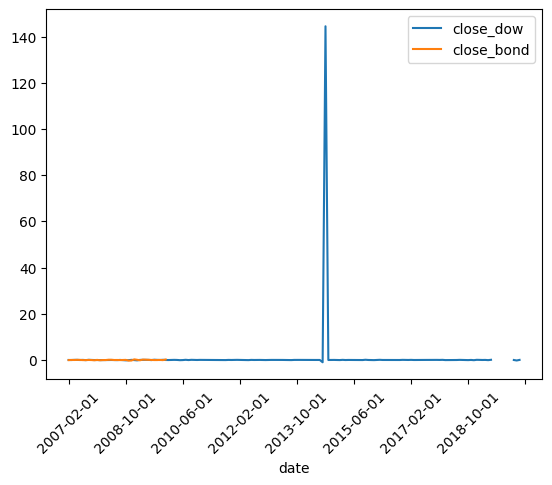

In [140]:
dow_bond.plot(x='date', y=['close_dow', 'close_bond'], rot=45)